In [2]:
import os
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
# install openpyxl


from tqdm import tqdm

pd.set_option('display.min_rows', 20)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [48]:
df = pd.read_excel('combined_edges_str.xlsx', dtype={'source': str, 'target': str})

### Logic: "source"/follower is following "target"

### Brand IDs

- 290081566 => @EsteeLauder

- 18148242 => @dermalogica

- 91259072 => @Neutrogena

- 44693072 => @cerave

- 132543891 => @SkinCeuticals


In [49]:
brand_list = ['1_@EsteeLauder', '2_@dermalogica', '3_@Neutrogena', '4_@cerave', '5_@SkinCeuticals']

In [50]:
for colname in ['source', 'target']:
    df.loc[df[colname]=='290081566', colname] = brand_list[0]
    df.loc[df[colname]=='18148242', colname] = brand_list[1]
    df.loc[df[colname]=='91259072', colname] = brand_list[2]
    df.loc[df[colname]=='44693072', colname] = brand_list[3]
    df.loc[df[colname]=='132543891', colname] = brand_list[4]

In [51]:
df

,source,target
0,1550173096744722432,4_@cerave
1,557884816,4_@cerave
2,1529429483387817985,4_@cerave
3,1578652520800555008,4_@cerave
4,1456425924,4_@cerave
5,2853150560,4_@cerave
6,1528726407995658241,4_@cerave
7,3084597184,4_@cerave
8,1392075915363065856,4_@cerave
9,1560415649729585155,4_@cerave


In [52]:
df.source[0]

'1550173096744722432'

In [53]:
## Num of followings
pd.DataFrame(df.source.value_counts())

,source
2_@dermalogica,1225
5_@SkinCeuticals,997
1_@EsteeLauder,452
3_@Neutrogena,432
4_@cerave,196
1568382218002735105,4
1572625750003441664,4
1572641040032567301,4
1409136155384221698,4
3059011803,4


In [54]:
## Num of followers
pd.DataFrame(df.target.value_counts())

,target
4_@cerave,5001
5_@SkinCeuticals,5001
2_@dermalogica,5001
1_@EsteeLauder,5000
3_@Neutrogena,5000
14222518,5
40965341,5
19247844,5
19658436,5
19546942,5


# Following/follower matrix:

In [55]:
def prep_matrix(df, colname='source', col_rename='following'):
    df_res = pd.DataFrame(df[colname].value_counts()).reset_index()
    df_res.columns = ['id', col_rename]
    #df_res = df_res.loc[df_res[col_rename] > 1, :]

    for b in brand_list:
        df_res[b] = 0

    return df_res

### 1. df_source: what brands people are following

In [56]:
# df_source = prep_matrix(df, colname='source', col_rename='following')

# for i in tqdm(range(len(df_source))):
#     targets = list(df[df['source'] == df_source.id[i]]['target'])
#     for j in brand_list:
#         if j in targets:
#             df_source.loc[i, j] = 1
            
# df_source['n_brand_following'] = np.sum(df_source.iloc[:, [2,3,4,5,6]], axis=1)

In [57]:
## Checking
# len(df_source) - np.sum(df_source.following == df_source['n_brand_following'])

## Output: 5

In [58]:
## Save CSV
# df_source.to_csv('m1_source.csv')

In [59]:
## Load CSV
df_source = pd.read_csv('m1_source.csv', index_col=0)

In [60]:
df_source

,id,following,1_@EsteeLauder,2_@dermalogica,3_@Neutrogena,4_@cerave,5_@SkinCeuticals,n_brand_following
0,2_@dermalogica,1225,0,0,0,0,0,0
1,5_@SkinCeuticals,997,0,1,0,1,0,2
2,1_@EsteeLauder,452,0,0,0,0,0,0
3,3_@Neutrogena,432,0,0,0,0,0,0
4,4_@cerave,196,0,0,0,0,1,1
5,1568382218002735105,4,1,0,1,1,1,4
6,1572625750003441664,4,1,0,1,1,1,4
7,1572641040032567301,4,1,0,1,1,1,4
8,1409136155384221698,4,1,0,1,1,1,4
9,3059011803,4,0,1,1,1,1,4


In [61]:
pd.DataFrame(df_source.n_brand_following.value_counts())

,n_brand_following
1,23597
2,567
3,80
4,8
0,3


In [62]:
big_fans = df_source[df_source.n_brand_following == 4].id.tolist()
big_fans

['1568382218002735105',
 '1572625750003441664',
 '1572641040032567301',
 '1409136155384221698',
 '3059011803',
 '1565358112172818434',
 '1556000179081416706',
 '1541449042604990465']

### Matrix 1. df_source: what brands people are following

### Analysis:

Among the brand followers we collected, 567 users are following 2 brands, 80 users are following 3 brands, 8 users are following 4 brands.

### Define big_fans:

The 8 users who follow 4 brands are: 

['1568382218002735105',
 '1572625750003441664',
 '1572641040032567301',
 '1409136155384221698',
 '3059011803',
 '1565358112172818434',
 '1556000179081416706',
 '1541449042604990465']

(array([3.0000e+00, 0.0000e+00, 2.3597e+04, 0.0000e+00, 0.0000e+00,
        5.6700e+02, 0.0000e+00, 8.0000e+01, 0.0000e+00, 8.0000e+00]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

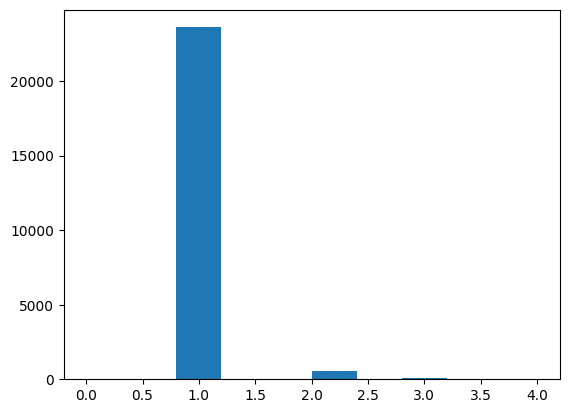

In [63]:
plt.hist(df_source.n_brand_following)

### 2. df_target: what brands are following them

In [64]:
# df_target = prep_matrix(df, colname='target', col_rename='follower')

# for i2 in tqdm(range(len(df_target))):
#     sources = list(df[df['target'] == df_target.id[i2]]['source'])
#     for j2 in brand_list:
#         if j2 in sources:
#             df_target.loc[i2, j2] = 1
            
# df_target['n_brand_follower'] = np.sum(df_target.iloc[:, [2,3,4,5,6]], axis=1)

In [65]:
## Checking
# len(df_target) - np.sum(df_target.follower == df_target['n_brand_follower'])

## Output: 5

In [66]:
## Save CSV
# df_target.to_csv('m2_target.csv')

In [67]:
## Load CSV
df_target = pd.read_csv('m2_target.csv', index_col=0)

In [68]:
df_target

,id,follower,1_@EsteeLauder,2_@dermalogica,3_@Neutrogena,4_@cerave,5_@SkinCeuticals,n_brand_follower
0,4_@cerave,5001,0,0,0,0,1,1
1,5_@SkinCeuticals,5001,0,0,0,1,0,1
2,2_@dermalogica,5001,0,0,0,0,1,1
3,1_@EsteeLauder,5000,0,0,0,0,0,0
4,3_@Neutrogena,5000,0,0,0,0,0,0
5,14222518,5,1,1,1,1,1,5
6,40965341,5,1,1,1,1,1,5
7,19247844,5,1,1,1,1,1,5
8,19658436,5,1,1,1,1,1,5
9,19546942,5,1,1,1,1,1,5


In [69]:
pd.DataFrame(df_target.n_brand_follower.value_counts())

,n_brand_follower
1,2445
2,222
3,64
4,44
5,9
0,2


In [70]:
brand_icons = df_target[df_target.n_brand_follower == 5].id.tolist()
brand_icons

['14222518',
 '40965341',
 '19247844',
 '19658436',
 '19546942',
 '15279429',
 '32469566',
 '14934818',
 '482591078']

### Matrix 2. df_target: what brands are following them

### Analysis

Among the accounts that the brands are following, 222 accounts are followed by 2 brands, 64 accounts are followed by 3 brands, 44 accounts are followed by 4 brands, 9 accounts are followed by 5 brands. 

### Define brand_icons:

The 9 accounts that are followed by 5 brands are: 

['14222518',
 '40965341',
 '19247844',
 '19658436',
 '19546942',
 '15279429',
 '32469566',
 '14934818',
 '482591078']

(array([2.000e+00, 0.000e+00, 2.445e+03, 0.000e+00, 2.220e+02, 0.000e+00,
        6.400e+01, 0.000e+00, 4.400e+01, 9.000e+00]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

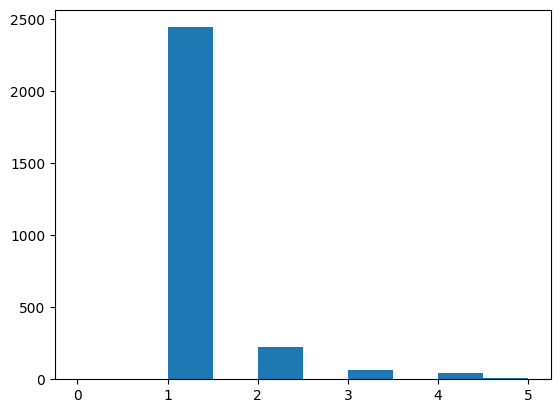

In [71]:
plt.hist(df_target.n_brand_follower)

### Matrix 1

In [72]:
for aa in big_fans:
    print(aa, '---', list(df[df['source'] == aa]['target']))

1568382218002735105 --- ['4_@cerave', '1_@EsteeLauder', '3_@Neutrogena', '5_@SkinCeuticals']
1572625750003441664 --- ['4_@cerave', '1_@EsteeLauder', '3_@Neutrogena', '5_@SkinCeuticals']
1572641040032567301 --- ['4_@cerave', '1_@EsteeLauder', '3_@Neutrogena', '5_@SkinCeuticals']
1409136155384221698 --- ['4_@cerave', '1_@EsteeLauder', '3_@Neutrogena', '5_@SkinCeuticals']
3059011803 --- ['4_@cerave', '2_@dermalogica', '3_@Neutrogena', '5_@SkinCeuticals']
1565358112172818434 --- ['4_@cerave', '2_@dermalogica', '1_@EsteeLauder', '5_@SkinCeuticals']
1556000179081416706 --- ['4_@cerave', '1_@EsteeLauder', '3_@Neutrogena', '5_@SkinCeuticals']
1541449042604990465 --- ['4_@cerave', '2_@dermalogica', '3_@Neutrogena', '5_@SkinCeuticals']


In [73]:
for aa in big_fans:
    print(aa, '---', list(df[df['target'] == aa]['source']))

1568382218002735105 --- []
1572625750003441664 --- []
1572641040032567301 --- []
1409136155384221698 --- []
3059011803 --- []
1565358112172818434 --- []
1556000179081416706 --- []
1541449042604990465 --- []


In [74]:
df_source.head(5)

,id,following,1_@EsteeLauder,2_@dermalogica,3_@Neutrogena,4_@cerave,5_@SkinCeuticals,n_brand_following
0,2_@dermalogica,1225,0,0,0,0,0,0
1,5_@SkinCeuticals,997,0,1,0,1,0,2
2,1_@EsteeLauder,452,0,0,0,0,0,0
3,3_@Neutrogena,432,0,0,0,0,0,0
4,4_@cerave,196,0,0,0,0,1,1


### Matrix 2

In [75]:
for bb in brand_icons:
    print(bb, '---', list(df[df['target'] == bb]['source']))

14222518 --- ['5_@SkinCeuticals', '4_@cerave', '1_@EsteeLauder', '2_@dermalogica', '3_@Neutrogena']
40965341 --- ['5_@SkinCeuticals', '4_@cerave', '1_@EsteeLauder', '2_@dermalogica', '3_@Neutrogena']
19247844 --- ['5_@SkinCeuticals', '4_@cerave', '1_@EsteeLauder', '2_@dermalogica', '3_@Neutrogena']
19658436 --- ['5_@SkinCeuticals', '4_@cerave', '1_@EsteeLauder', '2_@dermalogica', '3_@Neutrogena']
19546942 --- ['5_@SkinCeuticals', '4_@cerave', '1_@EsteeLauder', '2_@dermalogica', '3_@Neutrogena']
15279429 --- ['5_@SkinCeuticals', '4_@cerave', '1_@EsteeLauder', '2_@dermalogica', '3_@Neutrogena']
32469566 --- ['5_@SkinCeuticals', '4_@cerave', '1_@EsteeLauder', '2_@dermalogica', '3_@Neutrogena']
14934818 --- ['5_@SkinCeuticals', '4_@cerave', '1_@EsteeLauder', '2_@dermalogica', '3_@Neutrogena']
482591078 --- ['5_@SkinCeuticals', '4_@cerave', '1_@EsteeLauder', '2_@dermalogica', '3_@Neutrogena']


In [76]:
for bb in brand_icons:
    print(bb, '---', list(df[df['source'] == bb]['target']))

14222518 --- []
40965341 --- []
19247844 --- []
19658436 --- []
19546942 --- []
15279429 --- []
32469566 --- []
14934818 --- []
482591078 --- []


In [77]:
df_target.head(5)

,id,follower,1_@EsteeLauder,2_@dermalogica,3_@Neutrogena,4_@cerave,5_@SkinCeuticals,n_brand_follower
0,4_@cerave,5001,0,0,0,0,1,1
1,5_@SkinCeuticals,5001,0,0,0,1,0,1
2,2_@dermalogica,5001,0,0,0,0,1,1
3,1_@EsteeLauder,5000,0,0,0,0,0,0
4,3_@Neutrogena,5000,0,0,0,0,0,0


# Contribution by Munira Tabassum

In [3]:
df_tweets = pd.read_csv('brand_tweets.csv', index_col=0, dtype={'id': str})

In [14]:
df_tweets.columns.to_list()

['user',
 'id',
 'id_str',
 'full_text',
 'truncated',
 'display_text_range',
 'entities',
 'source',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'lang',
 'possibly_sensitive',
 'retweeted_status',
 'quoted_status',
 'text',
 'favorited_by',
 'scopes',
 'display_text_width',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status_permalink',
 'quote_count',
 'timestamp_ms',
 'reply_count',
 'filter_level',
 'metadata',
 'query',
 'withheld_scope',
 'withheld_copyright',
 'withheld_in_countries',
 'possibly_sensitive_appealable']

In [17]:
# print(df_tweets[df_tweets.retweet_count == df_tweets.retweet_count.max()])
print(df_tweets[df_tweets.text.str.contains('@|#')].head(5))
df_tweets_w_mentions = df_tweets[df_tweets.full_text.str.contains('@|#')]
len(df_tweets_w_mentions)

                               user                       id               id_str                                          full_text  truncated  display_text_range  entities                                             source  in_reply_to_status_id  in_reply_to_status_id_str  in_reply_to_user_id  in_reply_to_user_id_str in_reply_to_screen_name  geo  coordinates  place  contributors  is_quote_status  retweet_count  favorite_count  favorited  retweeted lang possibly_sensitive  retweeted_status  quoted_status                                               text  favorited_by  scopes  display_text_width  quoted_status_id  quoted_status_id_str  quoted_status_permalink  quote_count  timestamp_ms  reply_count  filter_level  metadata  query  withheld_scope  withheld_copyright  withheld_in_countries  possibly_sensitive_appealable
created_at                                                                                                                                                                

1157

In [23]:
brands_list = set(df_tweets_w_mentions.user)
brands_list = list(brands_list)
brands_list

['esteelauder', 'neutrogena', 'cerave', 'dermalogica', 'skinceuticals']

In [33]:
print('printing brand mentions:')
# make in_reply_to_screen_name to lower case
df_tweets_w_mentions.in_reply_to_screen_name = df_tweets_w_mentions.in_reply_to_screen_name.str.lower()
tweets_brand_mentions = df_tweets_w_mentions.loc[df_tweets_w_mentions.in_reply_to_screen_name.isin(brands_list),]
print(tweets_brand_mentions.head(5))
print(len(tweets_brand_mentions))

printing brand mentions:
                               user                   id               id_str                                          full_text  truncated  display_text_range  entities                                             source  in_reply_to_status_id  in_reply_to_status_id_str  in_reply_to_user_id  in_reply_to_user_id_str in_reply_to_screen_name  geo  coordinates  place  contributors  is_quote_status  retweet_count  favorite_count  favorited  retweeted lang possibly_sensitive  retweeted_status  quoted_status                                               text  favorited_by  scopes  display_text_width  quoted_status_id  quoted_status_id_str  quoted_status_permalink  quote_count  timestamp_ms  reply_count  filter_level  metadata  query  withheld_scope  withheld_copyright  withheld_in_countries  possibly_sensitive_appealable
created_at                                                                                                                                           

C:\Users\fazal\AppData\Local\Temp\ipykernel_11080\1940976745.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets_w_mentions.in_reply_to_screen_name = df_tweets_w_mentions.in_reply_to_screen_name.str.lower()


In [38]:
# order the rows by retweet_count
top_brand_mentions_retweet_count = tweets_brand_mentions.sort_values(by='retweet_count', ascending=False).head(5)
top_brand_mentions_retweet_count

,user,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,retweeted_status,quoted_status,text,favorited_by,scopes,display_text_width,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quote_count,timestamp_ms,reply_count,filter_level,metadata,query,withheld_scope,withheld_copyright,withheld_in_countries,possibly_sensitive_appealable
created_at,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-06-29T12:00:02Z,skinceuticals,1542115673601724400,1542115673601724416,In addition to providing a broad range of broa...,False,154,NaN,"<a href=""https://www.sprinklr.com"" rel=""nofoll...",1.542116e+18,1.542116e+18,132543891.0,132543891.0,skinceuticals,NaN,NaN,NaN,NaN,False,2,8,False,False,en,NaN,NaN,NaN,In addition to providing a broad range of broa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-19T18:30:02Z,skinceuticals,1571929627370684400,1571929627370684417,Pro-tip: The best way to apply serum to the fa...,False,230,NaN,"<a href=""https://www.sprinklr.com"" rel=""nofoll...",1.571930e+18,1.571930e+18,132543891.0,132543891.0,skinceuticals,NaN,NaN,NaN,NaN,False,1,3,False,False,en,NaN,NaN,NaN,Pro-tip: The best way to apply serum to the fa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-03T18:30:07Z,skinceuticals,1566131441099894800,1566131441099894784,"Recommended for combination skin, it can also ...",False,273,NaN,"<a href=""https://www.sprinklr.com"" rel=""nofoll...",1.566131e+18,1.566131e+18,132543891.0,132543891.0,skinceuticals,NaN,NaN,NaN,NaN,False,1,3,False,False,en,NaN,NaN,NaN,"Recommended for combination skin, it can also ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-02T18:00:09Z,skinceuticals,1554527486171562e3,1554527486171561984,Pro-Tip: Consult a SkinCeuticals skincare prof...,False,240,NaN,"<a href=""https://www.sprinklr.com"" rel=""nofoll...",1.554527e+18,1.554527e+18,132543891.0,132543891.0,skinceuticals,NaN,NaN,NaN,NaN,False,0,2,False,False,en,NaN,NaN,NaN,Pro-Tip: Consult a SkinCeuticals skincare prof...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-20T20:24:16Z,neutrogena,1538981077209186300,1538981077209186304,"Get to know #FirstFrame Fellow, Sarah Jean, an...",False,139,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1.528831e+18,1.528831e+18,91259072.0,91259072.0,neutrogena,NaN,NaN,NaN,NaN,False,0,1,False,False,en,False,NaN,NaN,"Get to know #FirstFrame Fellow, Sarah Jean, an...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# order the rows by favorite_count
top_brand_mention_fav_count = tweets_brand_mentions.sort_values(by='favorite_count', ascending=False).head(5)
top_brand_mention_fav_count

,user,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,retweeted_status,quoted_status,text,favorited_by,scopes,display_text_width,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quote_count,timestamp_ms,reply_count,filter_level,metadata,query,withheld_scope,withheld_copyright,withheld_in_countries,possibly_sensitive_appealable
created_at,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-06-29T12:00:02Z,skinceuticals,1542115673601724400,1542115673601724416,In addition to providing a broad range of broa...,False,154,NaN,"<a href=""https://www.sprinklr.com"" rel=""nofoll...",1.542116e+18,1.542116e+18,132543891.0,132543891.0,skinceuticals,NaN,NaN,NaN,NaN,False,2,8,False,False,en,NaN,NaN,NaN,In addition to providing a broad range of broa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-23T20:10:05Z,neutrogena,1528830646897938400,1528830646897938432,"Get to know #FirstFrame Fellow, Kyra, and go #...",False,159,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1.520099e+18,1.520099e+18,91259072.0,91259072.0,neutrogena,NaN,NaN,NaN,NaN,False,0,5,False,False,en,False,NaN,NaN,"Get to know #FirstFrame Fellow, Kyra, and go #...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-05T18:30:03Z,skinceuticals,1566856199089361e3,1566856199089360901,Formulated with HEPES for gentle enzyme-based ...,False,280,NaN,"<a href=""https://www.sprinklr.com"" rel=""nofoll...",1.566856e+18,1.566856e+18,132543891.0,132543891.0,skinceuticals,NaN,NaN,NaN,NaN,False,0,4,False,False,en,False,NaN,NaN,Formulated with HEPES for gentle enzyme-based ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-28T18:00:08Z,skinceuticals,1552715543152672800,1552715543152672769,Pro-Tip: Apply 4-5 drops of Phloretin CF in th...,False,137,NaN,"<a href=""https://www.sprinklr.com"" rel=""nofoll...",1.552716e+18,1.552716e+18,132543891.0,132543891.0,skinceuticals,NaN,NaN,NaN,NaN,False,0,4,False,False,en,NaN,NaN,NaN,Pro-Tip: Apply 4-5 drops of Phloretin CF in th...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-09T19:30:59Z,skinceuticals,1568321084080140300,1568321084080140291,How to use: Hold the bottle 6 inches away from...,False,215,NaN,"<a href=""https://www.sprinklr.com"" rel=""nofoll...",1.568321e+18,1.568321e+18,132543891.0,132543891.0,skinceuticals,NaN,NaN,NaN,NaN,False,0,3,False,False,en,NaN,NaN,NaN,How to use: Hold the bottle 6 inches away from...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df_tweets_w_mentions.sort_values(by='retweet_count', ascending=False)

,user,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,retweeted_status,quoted_status,text,favorited_by,scopes,display_text_width,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quote_count,timestamp_ms,reply_count,filter_level,metadata,query,withheld_scope,withheld_copyright,withheld_in_countries,possibly_sensitive_appealable
created_at,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-06-30T17:00:03Z,esteelauder,1542553564345962500,1542553564345962496,Take our minis on vacation with you – your ski...,False,142,NaN,"<a href=""https://prod1.sprinklr.com"" rel=""nofo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,46,62,False,False,en,False,NaN,NaN,Take our minis on vacation with you – your ski...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-11T14:00:23Z,esteelauder,1546494615695626200,1546494615695626243,NEW #AdvancedNightRepair Eye Supercharged Gel-...,False,203,NaN,"<a href=""https://prod1.sprinklr.com"" rel=""nofo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,37,56,False,False,en,False,NaN,NaN,NEW #AdvancedNightRepair Eye Supercharged Gel-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-06T15:36:54Z,esteelauder,1544706964978016300,1544706964978016257,🌞 Get a sun-kissed glow with #BronzeGoddess – ...,False,101,NaN,"<a href=""https://prod1.sprinklr.com"" rel=""nofo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,37,63,False,False,en,False,NaN,NaN,🌞 Get a sun-kissed glow with #BronzeGoddess – ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-05T14:00:02Z,esteelauder,1555554223831613400,1555554223831613441,Now available at @Dillards – Our limited-editi...,False,200,NaN,"<a href=""https://prod1.sprinklr.com"" rel=""nofo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,35,42,False,False,en,False,NaN,NaN,Now available at @Dillards – Our limited-editi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-25T20:23:21Z,esteelauder,1507453103536279600,1507453103536279554,We’ve transformed #AdvancedNightRepair into a ...,False,284,NaN,"<a href=""https://prod1.sprinklr.com"" rel=""nofo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,33,78,False,False,en,False,NaN,NaN,We’ve transformed #AdvancedNightRepair into a ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-14T17:13:01Z,dermalogica,1404487049906778e3,1404487049906778116,RT @peter_devito: Fabian was the first model I...,False,140,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,33,0,False,False,en,NaN,NaN,NaN,RT @peter_devito: Fabian was the first model I...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-26T17:00:04Z,esteelauder,1541104017346011100,1541104017346011142,The silky-soft texture of NEW #RevitalizingSup...,False,244,NaN,"<a href=""https://prod1.sprinklr.com"" rel=""nofo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,32,51,False,False,en,False,NaN,NaN,The silky-soft texture of NEW #RevitalizingSup...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-20T15:00:09Z,esteelauder,1538899509576712200,1538899509576712198,Your perfect #lipbalm exists and you’ve got to...,False,199,NaN,"<a href=""https://prod1.sprinklr.com"" rel=""nofo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,31,49,False,False,en,False,NaN,NaN,Your perfect #lipbalm exists and you’ve got to...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-09T15:00:13Z,esteelauder,1534913259555508200,1534913259555508224,Color on the go Take #PureColorEnvy Luxe Quad ...,False,197,NaN,"<a href=""https://prod1.sprinklr.com"" rel=""nofo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,29,44,False,False,en,False,NaN,NaN,Color on the go Ta

In [43]:
df_tweets_w_mentions.sort_values(by='favorite_count', ascending=False)

,user,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,retweeted_status,quoted_status,text,favorited_by,scopes,display_text_width,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quote_count,timestamp_ms,reply_count,filter_level,metadata,query,withheld_scope,withheld_copyright,withheld_in_countries,possibly_sensitive_appealable
created_at,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-09-02T17:49:41Z,cerave,1565758878662508500,1565758878662508544,@MakeupForWOC Music to our ears! ✨,False,34,NaN,"<a href=""http://twitter.com/download/iphone"" r...",1.565755e+18,1.565755e+18,3.950478e+09,3.950478e+09,makeupforwoc,NaN,NaN,NaN,NaN,False,0,165,False,False,en,NaN,NaN,NaN,@MakeupForWOC Music to our ears! ✨,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-10T22:00:02Z,esteelauder,1568720985280622600,1568720985280622595,Backstage beauty with #EsteeGlobalAmbassador A...,False,185,NaN,"<a href=""https://prod1.sprinklr.com"" rel=""nofo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,22,136,False,False,en,False,NaN,NaN,Backstage beauty with #EsteeGlobalAmbassador A...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-25T20:23:21Z,esteelauder,1507453103536279600,1507453103536279554,We’ve transformed #AdvancedNightRepair into a ...,False,284,NaN,"<a href=""https://prod1.sprinklr.com"" rel=""nofo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,33,78,False,False,en,False,NaN,NaN,We’ve transformed #AdvancedNightRepair into a ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-29T18:06:31Z,cerave,1564313563870773200,1564313563870773249,🗣 Calling our #CeraVeCommunity \n\nWe want to ...,False,156,NaN,"<a href=""https://sproutsocial.com"" rel=""nofoll...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,18,74,False,False,en,False,NaN,NaN,🗣 Calling our #CeraVeCommunity \n\nWe want to ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-07T14:49:02Z,cerave,1567525355556163600,1567525355556163584,We're here to help you identify which acne pro...,False,253,NaN,"<a href=""https://sproutsocial.com"" rel=""nofoll...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,9,64,False,False,en,False,NaN,NaN,We're here to help you identify which acne pro...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-06T15:36:54Z,esteelauder,1544706964978016300,1544706964978016257,🌞 Get a sun-kissed glow with #BronzeGoddess – ...,False,101,NaN,"<a href=""https://prod1.sprinklr.com"" rel=""nofo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,37,63,False,False,en,False,NaN,NaN,🌞 Get a sun-kissed glow with #BronzeGoddess – ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-30T17:00:03Z,esteelauder,1542553564345962500,1542553564345962496,Take our minis on vacation with you – your ski...,False,142,NaN,"<a href=""https://prod1.sprinklr.com"" rel=""nofo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,46,62,False,False,en,False,NaN,NaN,Take our minis on vacation with you – your ski...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-23T21:55:21Z,dermalogica,1418691230070755300,1418691230070755329,@tyongsneo Thanks for the recommendation! We l...,False,69,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1.418555e+18,1.418555e+18,1.329846e+18,1.329846e+18,tyongsneo,NaN,NaN,NaN,NaN,False,13,60,False,False,en,NaN,NaN,NaN,@tyongsneo Thanks for the recommendation! We l...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-19T13:00:13Z,cerave,1571846622874673200,1571846622874673155,Do you know the right way to apply CeraVe prod...,False,140,NaN,"<a href=""https://sproutsocial.com"" rel=""nofoll...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,5,57,False,False,en

In [45]:
brand_info = pd.read_csv("brand_info.csv")

# remove rows that has NaN in brand column
brand_info = brand_info[brand_info.brand.notna()]
print(brand_info.head(5))

           brand             label location  founded_year   twitter_acct   twitter_id                        twitter_url num_following num_followers joined_date                   official_site                                               wiki  Unnamed: 12  Unnamed: 13  Unnamed: 14  Unnamed: 15  Unnamed: 16  Unnamed: 17  Unnamed: 18  Unnamed: 19  Unnamed: 20  Unnamed: 21  Unnamed: 22  Unnamed: 23  Unnamed: 24  Unnamed: 25  Unnamed: 26  Unnamed: 27  Unnamed: 28  Unnamed: 29  Unnamed: 30  Unnamed: 31
0   Estee Lauder    1_@EsteeLauder      USA        1946.0    EsteeLauder  290081566.0    https://twitter.com/EsteeLauder           452       412,700      2011-4    https://www.esteelauder.com/  https://en.wikipedia.org/wiki/The_Est%C3%A9e_L...          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN      

In [46]:
brand_info

,brand,label,location,founded_year,twitter_acct,twitter_id,twitter_url,num_following,num_followers,joined_date,official_site,wiki,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,Estee Lauder,1_@EsteeLauder,USA,1946.0,EsteeLauder,290081566.0,https://twitter.com/EsteeLauder,452,"412,700",2011-4,https://www.esteelauder.com/,https://en.wikipedia.org/wiki/The_Est%C3%A9e_L...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dermalogica,2_@dermalogica,USA,1986.0,dermalogica,18148242.0,https://twitter.com/dermalogica,"1,225","54,300",2008-12,https://www.dermalogica.com/,https://en.wikipedia.org/wiki/Dermalogica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Neutrogena,3_@Neutrogena,USA,1930.0,Neutrogena,91259072.0,https://twitter.com/Neutrogena,432,"48,900",2009-11,https://www.neutrogena.com/,https://en.wikipedia.org/wiki/Neutrogena,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Cerave,4_@cerave,USA,2005.0,cerave,44693072.0,https://twitter.com/cerave,196,"48,400",2009-6,https://www.cerave.com/,https://en.wikipedia.org/wiki/L%27Or%C3%A9al,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SkinCeuticals,5_@SkinCeuticals,USA,1997.0,SkinCeuticals,132543891.0,https://twitter.com/SkinCeuticals,997,"47,900",2010-4,https://www.skinceuticals.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Paula's choice,NaN,USA,1995.0,PaulasChoice,NaN,https://twitter.com/PaulasChoice,562,"31,700",2008-8,https://www.paulaschoice.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Inkey list,NaN,UK,2018.0,theinkeylist,NaN,https://twitter.com/theinkeylist,51,"2,605",2018-6,https://www.theinkeylist.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Cetaphil,NaN,USA,1947.0,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cetaphil.com/us/,https://en.wikipedia.org/wiki/Cetaphil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,The ordinary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://theordinary.com/en-us,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# make twitter_acct column to lower case
brand_info.twitter_acct = brand_info.twitter_acct.str.lower()
# keep the rows that has twitter_acct in brands_list
brand_info = brand_info[brand_info.twitter_acct.isin(brands_list)]
brand_info.head(5)

C:\Users\fazal\AppData\Local\Temp\ipykernel_11080\1504380418.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_info.twitter_acct = brand_info.twitter_acct.str.lower()


,brand,label,location,founded_year,twitter_acct,twitter_id,twitter_url,num_following,num_followers,joined_date,official_site,wiki,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,Estee Lauder,1_@EsteeLauder,USA,1946.0,esteelauder,290081566.0,https://twitter.com/EsteeLauder,452,"412,700",2011-4,https://www.esteelauder.com/,https://en.wikipedia.org/wiki/The_Est%C3%A9e_L...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dermalogica,2_@dermalogica,USA,1986.0,dermalogica,18148242.0,https://twitter.com/dermalogica,"1,225","54,300",2008-12,https://www.dermalogica.com/,https://en.wikipedia.org/wiki/Dermalogica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Neutrogena,3_@Neutrogena,USA,1930.0,neutrogena,91259072.0,https://twitter.com/Neutrogena,432,"48,900",2009-11,https://www.neutrogena.com/,https://en.wikipedia.org/wiki/Neutrogena,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Cerave,4_@cerave,USA,2005.0,cerave,44693072.0,https://twitter.com/cerave,196,"48,400",2009-6,https://www.cerave.com/,https://en.wikipedia.org/wiki/L%27Or%C3%A9al,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SkinCeuticals,5_@SkinCeuticals,USA,1997.0,skinceuticals,132543891.0,https://twitter.com/SkinCeuticals,997,"47,900",2010-4,https://www.skinceuticals.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# getting retweet matrix

In [59]:
brand_retweets = []

for brand in brands_list:
    retweet_count = df_tweets[df_tweets.user == brand].retweet_count.sum()
    brand_retweets.append([brand, retweet_count])
    print(brand, retweet_count)

brand_retweets

esteelauder 1283
neutrogena 30
cerave 96
dermalogica 743
skinceuticals 188


[['esteelauder', 1283],
 ['neutrogena', 30],
 ['cerave', 96],
 ['dermalogica', 743],
 ['skinceuticals', 188]]

# getting favorite matrix

In [60]:
brand_favorites = []

for brand in brands_list:
    favorite_count = df_tweets[df_tweets.user == brand].favorite_count.sum()
    brand_favorites.append([brand, favorite_count])
    print(brand, favorite_count)

print(brand_favorites)

esteelauder 2692
neutrogena 114
cerave 1007
dermalogica 1981
skinceuticals 1184
[['esteelauder', 2692], ['neutrogena', 114], ['cerave', 1007], ['dermalogica', 1981], ['skinceuticals', 1184]]
